
# Kaggle Competition
## Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during 
her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers 
and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats 
for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more 
likely to survive than others, such as women, children, and the upper-class.

In this challenge, Kaggle ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, Kaggle ask you to apply the tools of machine learning to predict which passengers survived 
the tragedy.



In [1]:
# Load Data
import csv as csv
import numpy as np
csv_file_object = csv.reader(open('../csv/train.csv', 'rb'))
header = csv_file_object.next()
data = []
for row in csv_file_object:
    data.append(row)
data = np.array(data)
print data


[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


## Intro 

use pandas to engineering changes to data, then use sklearn.ensemble.RandomForestClassifier to predict outcome.

## Exploratory Data Analysis

### ----- Read csv files in panda -----

In [2]:
import re
import pandas as pd
import pylab as P

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.ensemble import RandomForestClassifier



In [3]:
train = pd.read_csv('../csv/train.csv', header=0)
#print df.head(3)

test = pd.read_csv('../csv/test.csv', header=0)
#print tdf.head(3)

#titanic = pd.concat([train,test],ignore_index=True)
titanic = train
titanic_test = test

In [4]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
type(titanic)

pandas.core.frame.DataFrame

### ------ Study dataframe features and correlations ------

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.describe().transpose()

/Users/LiWang/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,NaN,NaN,NaN,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Survival by Gender and Age

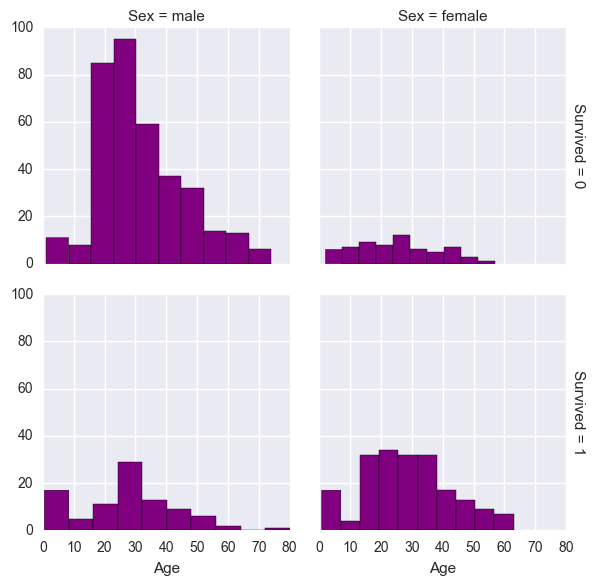

In [9]:
# Survival by Gender and Age
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")


#### Survival by Fare and Age factored by Pclsss

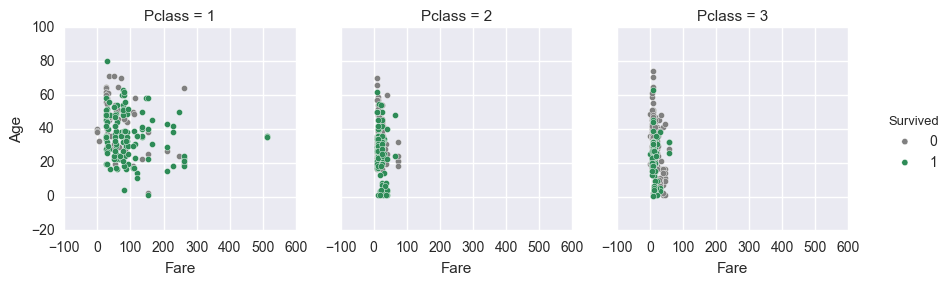

In [10]:
# Survival by Fare and Age factored by Pclsss
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
# Less older people survived

#### Survival by Fare and Age factored by Sex 

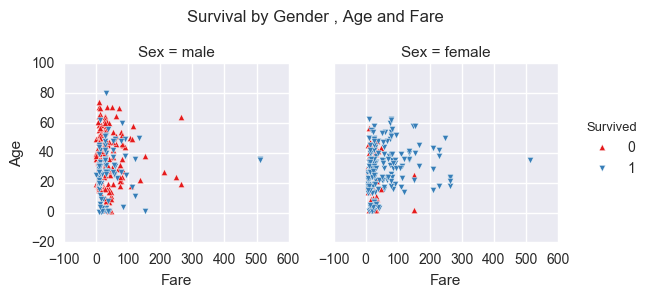

In [11]:
# Survival by Fare and Age factored by Sex 
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

#### Correlation study of features

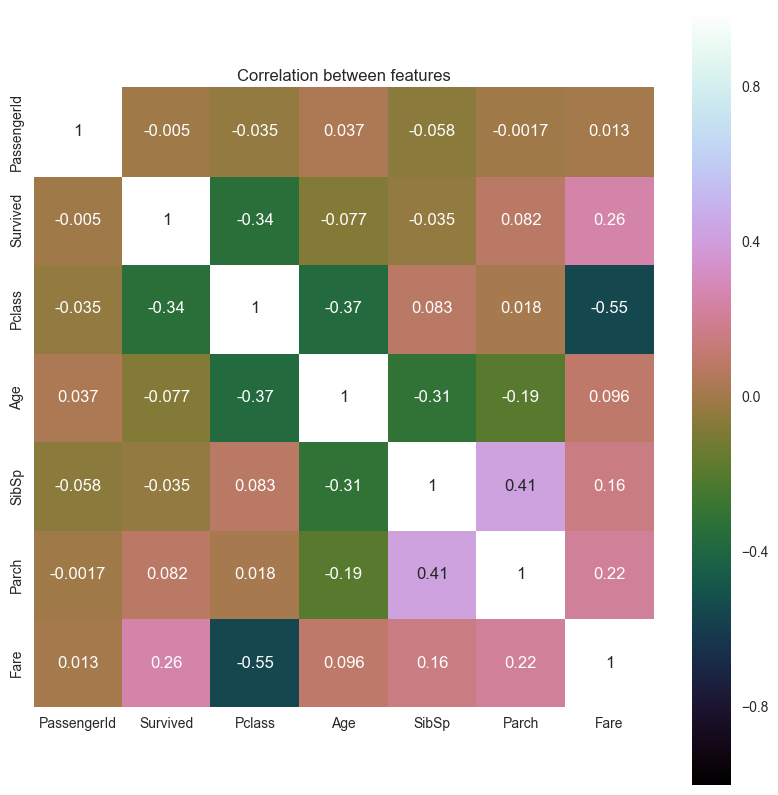

In [12]:
# Correlation study of features

corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

#### correlation of features with target variable

In [13]:
# correlation of features with target variable
titanic.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

#### sex distribution by Pclass and Embarked

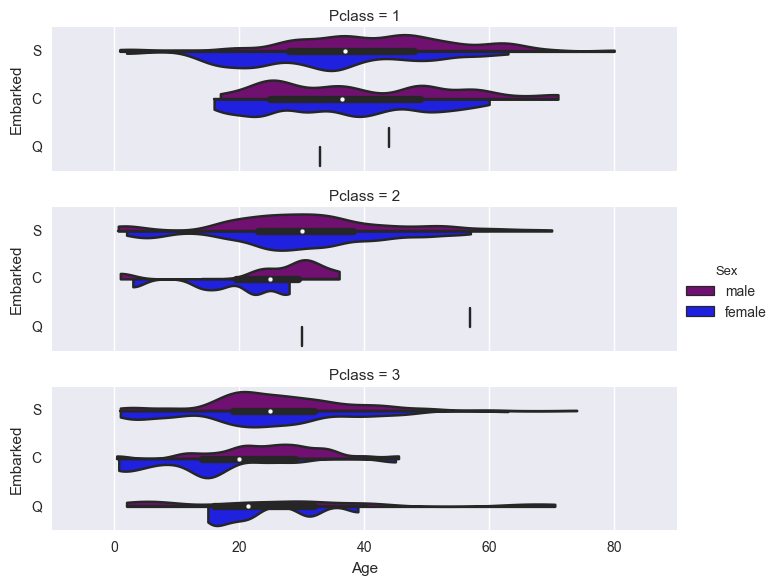

In [14]:
# sex distribution by Pclass and Embarked
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic[titanic.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2)

#### Fare by Pclass and Embarked

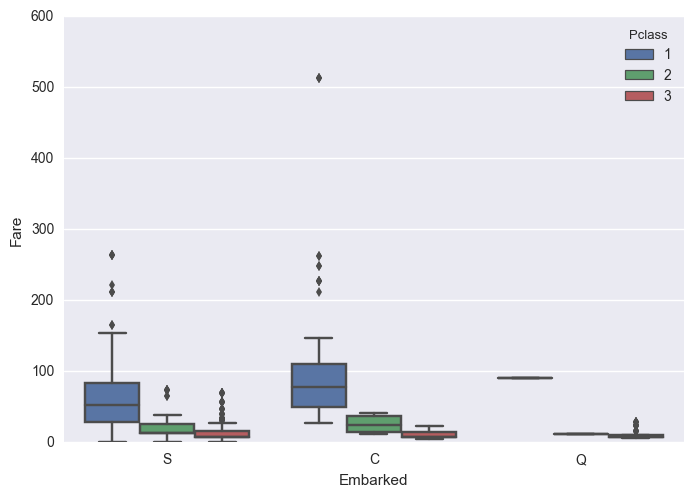

In [15]:
# Fare by Pclass and Embarked
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic)

Higher median fare for first class from Port 'C'

#### Age Distribution and Survival  by Age and other factors

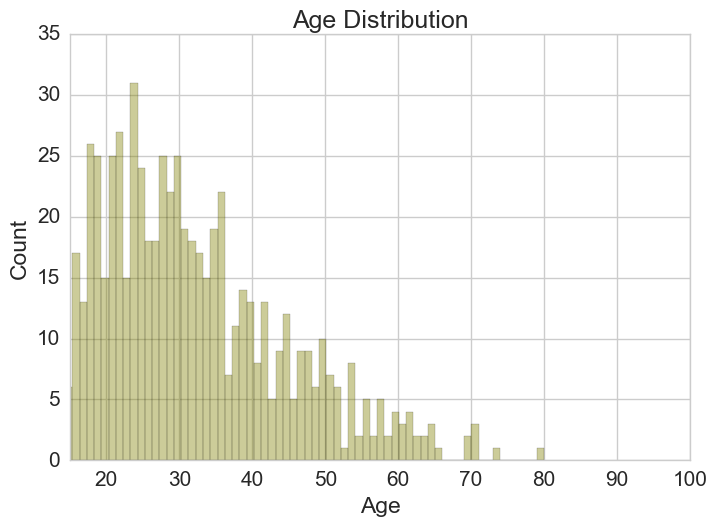

In [16]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="olive")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

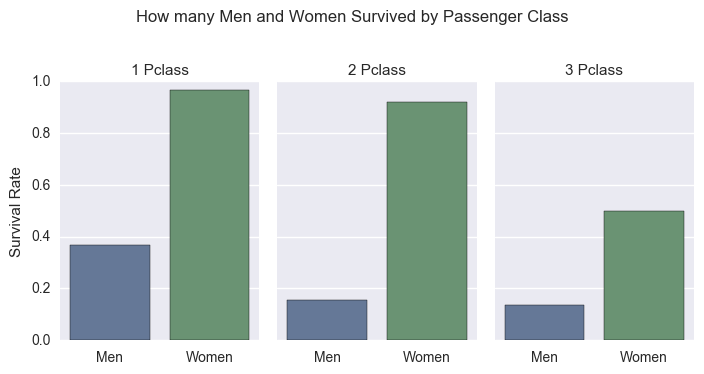

In [17]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')
# Gender is a significiant factor for survival

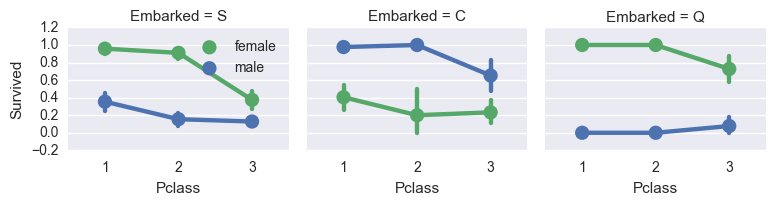

In [18]:
grid = sns.FacetGrid(titanic, col='Embarked', size=2.2, aspect=1.2, legend_out=False)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

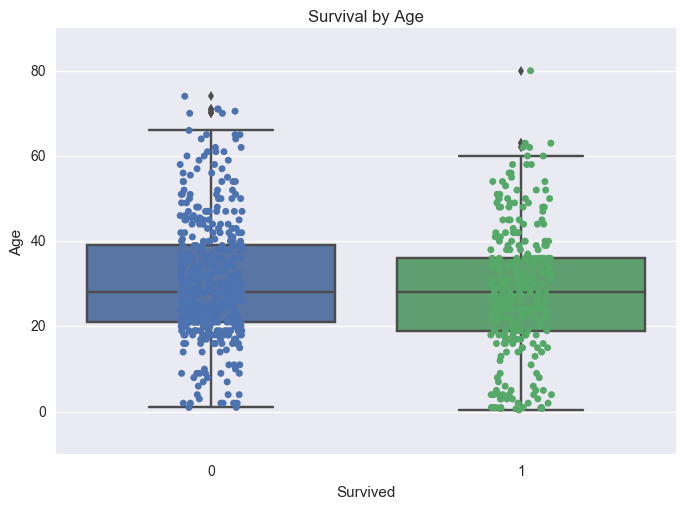

In [19]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12)

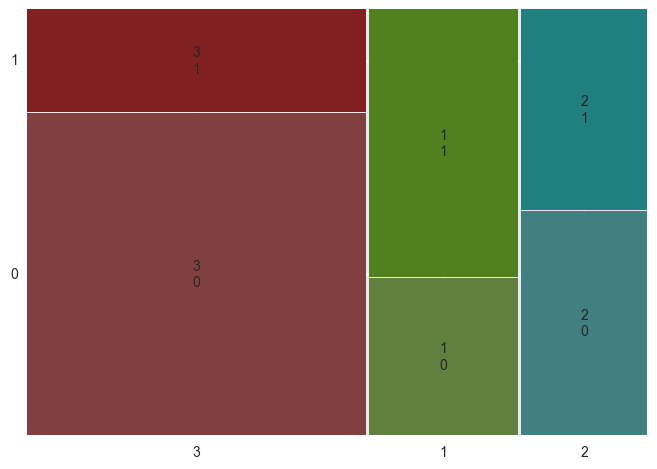

In [20]:
mosaic(titanic, ['Pclass', 'Survived'])
P.show()

### ------ Engineering New Features ------

#### Creat new column 'Deck'

In [21]:
# Creat new column 'Deck'

def create_deck_col(df):
    df['Deck'] = df['Cabin'].str[0]
    
    df['DeckZ'] = df['Deck']
    df.DeckZ.fillna('Z', inplace=True)
    df['DeckZ'] = df['DeckZ'].map( {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'T': 6, 'F': 7, 'G': 8, 'Z': 0} ).astype(int)
    
    return df

In [22]:
titanic = create_deck_col(titanic)
titanic_test = create_deck_col(titanic_test)

#titanic["Deck"].unique() # 0 is for null values
#original: array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)
titanic["DeckZ"].unique()

array([0, 3, 5, 8, 4, 1, 2, 7, 6])

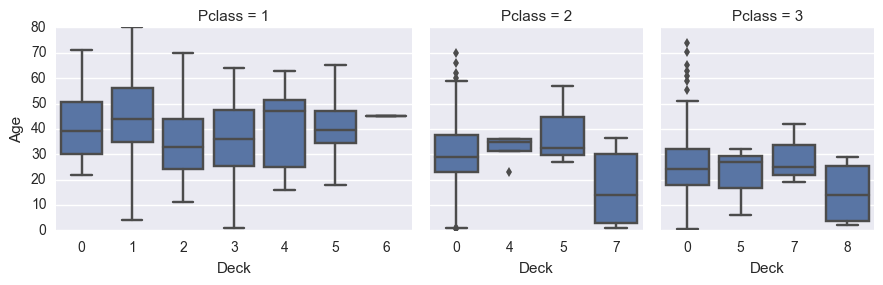

In [23]:
titanic_d = titanic.assign(Deck=titanic.DeckZ.astype(object)).sort_values(by="DeckZ")
g = sns.FacetGrid(titanic_d, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

For Deck column, there are a lot of null value.  Once null values replaced with Z, 
survival difference among Pclass are not significiant.

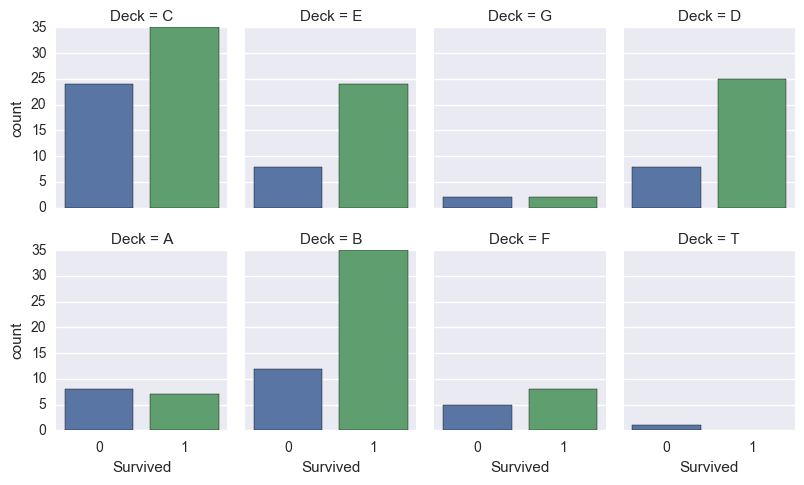

In [24]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8)

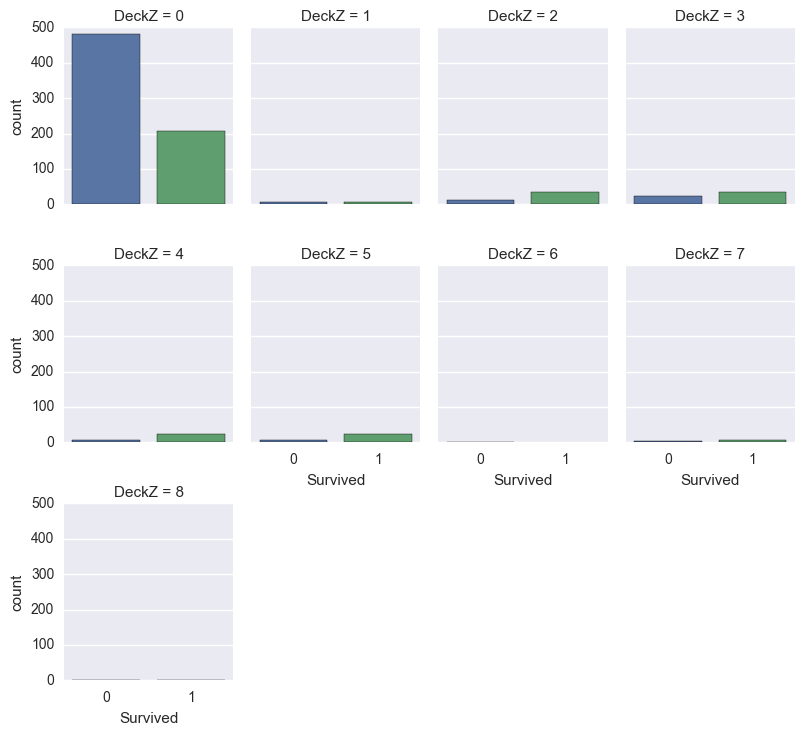

In [25]:
g = sns.factorplot("Survived", col="DeckZ", col_wrap=4,
                    data=titanic,
                    kind="count", size=2.5, aspect=.8)

#### Create feature for length of name 

In [26]:
# Create feature for length of name 

def create_name_length_col(df):
    # The .apply method generates a new series
    df["NameLength"] = df["Name"].apply(lambda x: len(x))

    #bins = [0, 20, 40, 57, 85]
    #group_names = ['short', 'okay', 'good', 'long']
    #df['NlengthD'] = pd.cut(df['NameLength'], bins, labels=group_names)
    df['NlengthD'] = df["Name"].apply(lambda x: round(len(x)/10))
    return df


In [27]:
titanic = create_name_length_col(titanic)
print(titanic["NlengthD"].value_counts())

2.0    428
1.0    204
3.0    162
4.0     68
5.0     25
6.0      3
8.0      1
Name: NlengthD, dtype: int64


[ 2.  5.  4.  1.  3.  8.  6.]


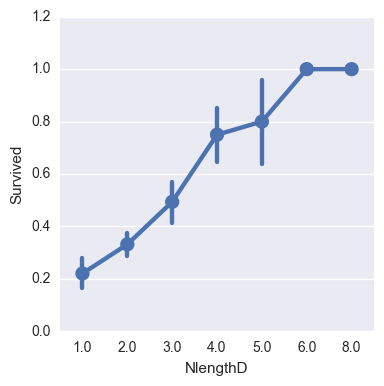

In [28]:
sns.factorplot(x="NlengthD", y="Survived", data=titanic)
print(titanic["NlengthD"].unique())

In [29]:
titanic_test = create_name_length_col(titanic_test)

#### Create new column title 

In [30]:
def create_title_col(df):
    df['Title'] = df['Name'].str.extract('([A-Z]\w{0,}\.)', expand=True)
    
    df.loc[df["Title"] == "Mlle.", "Title"] = 'Miss.'
    df.loc[df["Title"] == "Ms.", "Title"] = 'Miss.'
    df.loc[df["Title"] == "Mme.", "Title"] = 'Mrs.'
    df.loc[df["Title"] == "Dona.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Lady.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Countess.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Capt.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Col.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Don.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Major.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Rev.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Sir.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Jonkheer.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Dr.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Master.", "Title"] = 'Rare.'
    
    df.loc[ df['Title'] == 'Mr.', 'TitleNum' ] = 1
    df.loc[ df['Title'] == 'Miss.', 'TitleNum'] = 2
    df.loc[ df['Title'] == 'Mrs.', 'TitleNum' ] = 3
    df.loc[ df['Title'] == 'Rare.', 'TitleNum' ] = 4
    
    return df

In [31]:
titanic = create_title_col(titanic)
titanic['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Rare.'], dtype=object)

In [32]:
titanic['TitleNum'].unique()

array([ 1.,  3.,  2.,  4.])

In [33]:
titanic[titanic['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,DeckZ,NameLength,NlengthD,Title,TitleNum


In [34]:
#df['Title'].unique()
#array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
#       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', nan, 'Col.', 'Capt.',
#       'Countess.', 'Jonkheer.'], dtype=object)

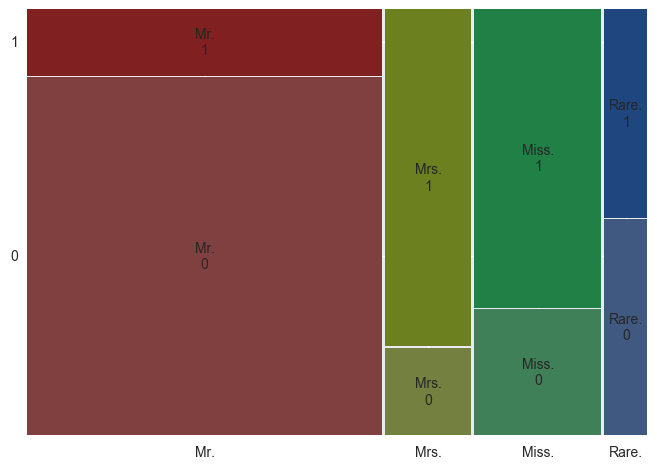

In [35]:
#from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['Title', 'Survived'])
P.show()

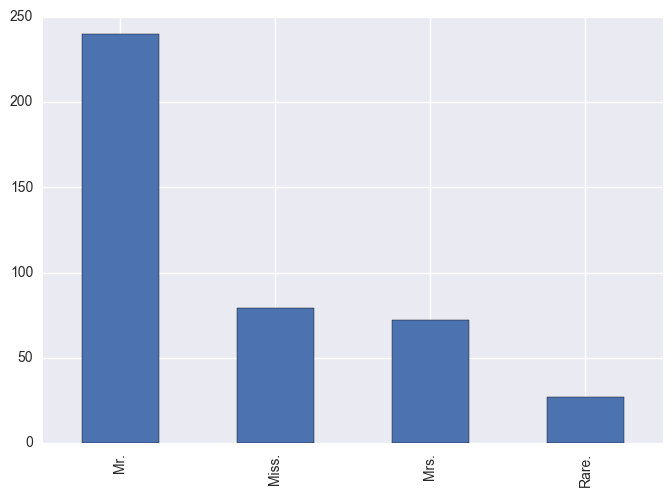

In [36]:
titanic_test = create_title_col(titanic_test)
titanic_test.Title.value_counts().plot(kind='bar')
P.show()

In [37]:
titanic_test['Title'].isnull().any()

False

#### Engineering new column Gender with int, female:0, male: 1, child(16): 2

In [38]:
for i in range(4):
    print i, len(titanic[ (titanic['Sex'] == 'male') & (titanic['Pclass'] == i) ])

0 0
1 122
2 108
3 347


In [39]:
def create_gender_col(df):
    #df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df.loc[ df['Age'] < 16, 'Gender' ] = 2
    return df

In [40]:
titanic = create_gender_col(titanic)
titanic.Gender.unique()

array([1, 0, 2])

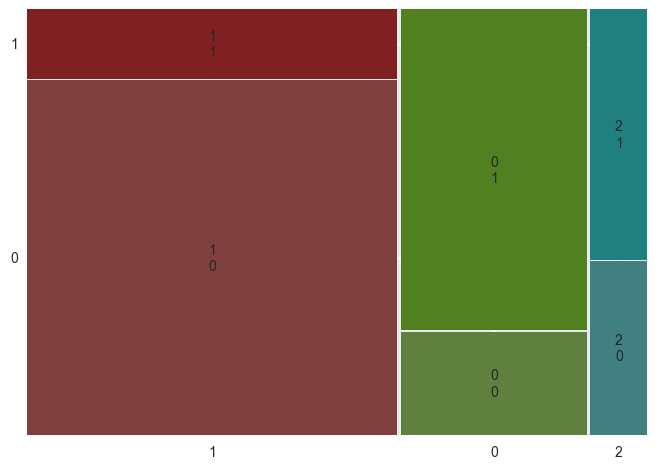

In [41]:
mosaic( titanic, ['Gender', 'Survived'] )
P.show()

In [42]:
titanic_test = create_gender_col(titanic_test)
titanic_test.Gender.unique()

array([1, 0, 2])

#### Fill in missing data - Embarked and Engineering new column - Port with int 

Embarked: Cherbourg (2), Southamption (1), and Queenstown (3)

In [43]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
titanic[ titanic['Embarked'].isnull() ][['Sex', 'Pclass', 'Embarked', 'Fare']].head(10)

,Sex,Pclass,Embarked,Fare
61,female,1,NaN,80.0
829,female,1,NaN,80.0


In [45]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'S') ].Fare.median()

79.65

In [46]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'C') ].Fare.median()

83.1583

In [47]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q') ].Fare.median()

90.0

In [48]:
titanic['Port'] = titanic['Embarked']

In [49]:
titanic.loc[ titanic['Embarked'].isnull(), 'Port'] = 'S'

In [50]:
titanic[ titanic['Embarked'].isnull() ][['Sex', 'Pclass', 'Embarked', 'Fare', 'Port']]

,Sex,Pclass,Embarked,Fare,Port
61,female,1,NaN,80.0,S
829,female,1,NaN,80.0,S


In [51]:
def transform_port_num(df):
    df['Port'] = df['Port'].map( {'S': 1, 'C': 2, 'Q': 3} )
    return df   

In [52]:
titanic = transform_port_num(titanic)
titanic['Port'].unique()
#original: array(['S', 'C', 'Q'], dtype=object)

array([1, 2, 3])

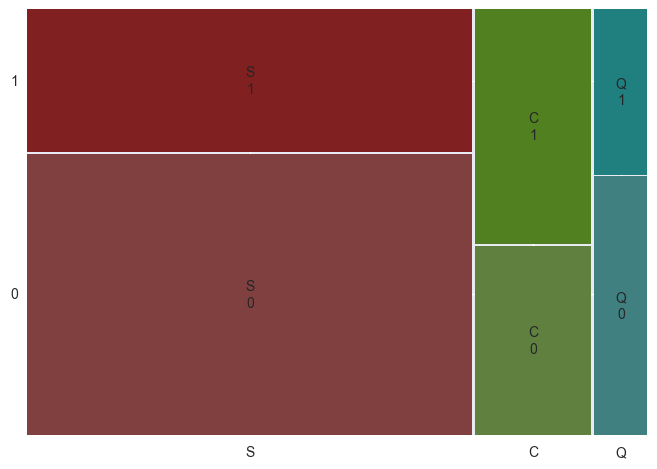

In [53]:
mosaic( titanic, ['Embarked', 'Survived'])
P.show()

In [54]:
titanic_test[ titanic_test['Embarked'].isnull() ][['Gender', 'Pclass', 'Embarked']]

,Gender,Pclass,Embarked


In [55]:
titanic_test['Port'] = titanic_test['Embarked']
titanic_test = transform_port_num(titanic_test)
titanic_test['Port'].unique()

array([3, 1, 2])

In [56]:
#titanic_test['Port'].unique()
#array(['Q', 'S', 'C'], dtype=object)

#### Engineering new FamilySize column 

In [57]:
### Engineering new FamilySize column 

def create_familysize_col(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    df['FsizeD'] = 1
    df.loc[ (df['FamilySize'] > 1) & (df['FamilySize'] < 5), 'FsizeD'] = 2
    df.loc[ df['FamilySize'] >= 5, 'FsizeD'] = 3
    
    return df

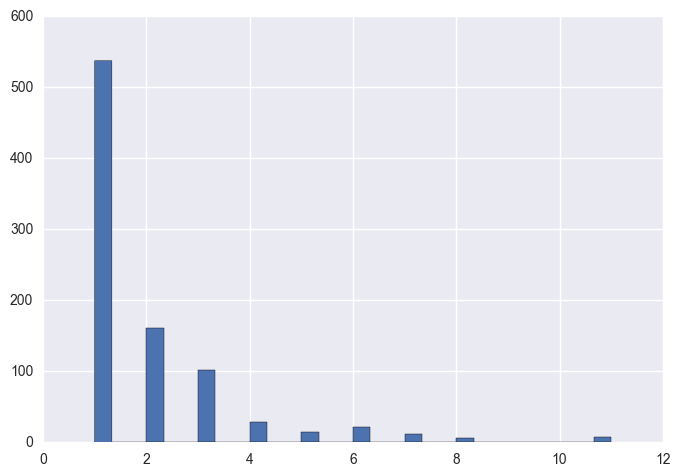

In [58]:
titanic = create_familysize_col(titanic)
titanic['FamilySize'].hist(bins=30)

In [59]:
titanic['FsizeD'].unique()

array([2, 1, 3])

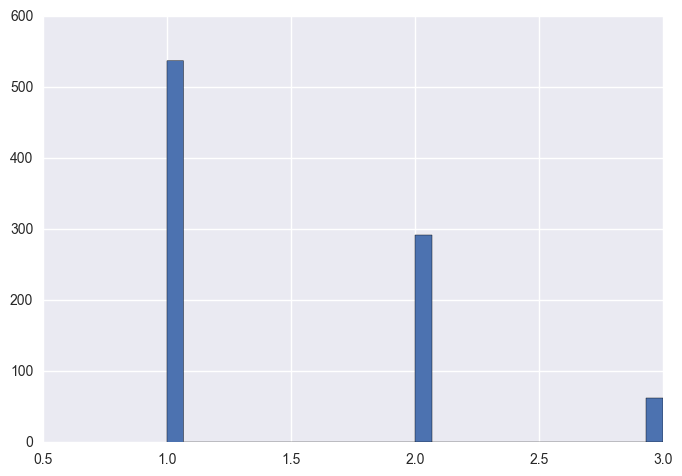

In [60]:
titanic['FsizeD'].hist(bins=30)

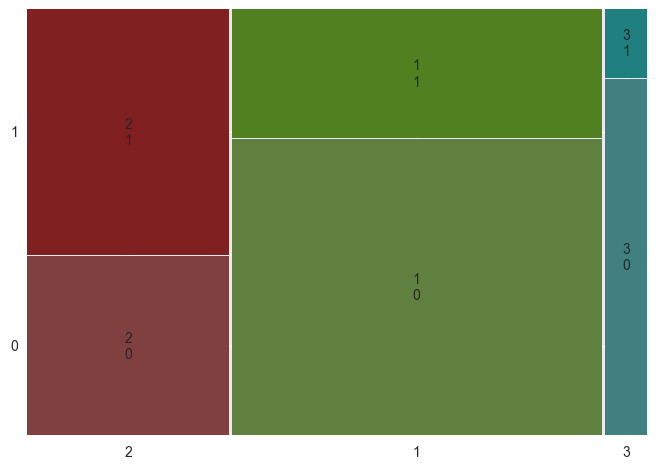

In [61]:
mosaic(titanic, ['FsizeD', 'Survived'])
P.show()

In [62]:
titanic_test = create_familysize_col(titanic_test)

#### Create new column - TicketClean

In [63]:
titanic["TicketClean"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)

print("Rows with NaN: " + str(pd.isnull(titanic["TicketClean"]).nonzero()[0]))
print("Ticket number: ")
print(str(titanic["Ticket"].ix[179]))
print(str(titanic["Ticket"].ix[271]))
print(str(titanic["Ticket"].ix[302]))
print(str(titanic["Ticket"].ix[597]))
print(str(titanic["Ticket"].ix[772]))
print(str(titanic["Ticket"].ix[841]))
#print(str(titanic["Ticket"].ix[1077]))
#print(str(titanic["Ticket"].ix[1193]))

Rows with NaN: [179 271 302 597 772 841]
Ticket number: 
LINE
LINE
LINE
LINE
S.O./P.P. 3
S.O./P.P. 3


In [64]:
titanic["TicketClean"] = titanic["TicketClean"].apply(pd.to_numeric)
med1 = titanic["TicketClean"].median()
med2 = titanic["TicketClean"].median() + titanic["TicketClean"].std()
med3 = titanic["TicketClean"].median() - titanic["TicketClean"].std()
titanic.set_value(179, 'TicketClean', int(med1))
titanic.set_value(271, 'TicketClean', int(med1))
titanic.set_value(302, 'TicketClean', int(med1))
titanic.set_value(597, 'TicketClean', int(med1))
titanic.set_value(772, 'TicketClean', int(med2))
titanic.set_value(841, 'TicketClean', int(med2))
#titanic.set_value(1077, 'TicketClean', int(med2))
#titanic.set_value(1193, 'TicketClean', int(med2))
titanic["TicketClean"].head()

0      21171.0
1      17599.0
2    3101282.0
3     113803.0
4     373450.0
Name: TicketClean, dtype: float64

In [65]:
titanic_test['TicketClean'] = titanic_test['Ticket'].str.extract('(\d{2,})', expand=True)

print ("Test Rows with NaN: " + str(pd.isnull(titanic_test["TicketClean"]).nonzero()[0]))
print('Ticket number:')
print(str(titanic_test['Ticket'].ix[186]))
print(str(titanic_test['Ticket'].ix[302]))

Test Rows with NaN: [186 302]
Ticket number:
S.O./P.P. 2
S.O./P.P. 2


In [66]:
titanic_test['TicketClean'] = titanic_test['TicketClean'].apply(pd.to_numeric)
med1_t = titanic_test['TicketClean'].median()
med2_t = titanic_test['TicketClean'].median() + titanic_test['TicketClean'].std()
med3_t = titanic_test['TicketClean'].median() - titanic_test['TicketClean'].std()
titanic.set_value(186, 'TicketClean', int(med2))
titanic.set_value(302, 'TicketClean', int(med2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,2.0,Mr.,1.0,1,1,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,3,51,5.0,Mrs.,3.0,0,2,2,2,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,2.0,Miss.,2.0,0,1,1,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,3,44,4.0,Mrs.,3.0,0,1,2,2,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,2.0,Mr.,1.0,1,1,1,1,373450.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,16,1.0,Mr.,1.0,1,3,1,1,330877.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,5,23,2.0,Mr.,1.0,1,1,1,1,17463.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,30,3.0,Rare.,4.0,2,1,5,3,349909.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,49,4.0,Mrs.,3.0,0,1,3,2,347742.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,35,3.0,Mrs.,3.0,2,2,2,2,237736.0


#### Fill missing data in Fare (test data)

In [67]:
titanic[ titanic['Fare'].isnull() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean


In [68]:
titanic_test[ titanic_test['Fare'].isnull() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,0,18,1.0,Mr.,1.0,1,1,1,1,3701.0


In [69]:
titanic[ (titanic['Pclass'] == 3) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'S') ].Fare.median()

8.05

In [70]:
titanic_test.loc[ titanic_test['PassengerId'] == 1044, 'Fare' ] = 8.05

In [71]:
titanic_test[ titanic_test['Fare'].isnull() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean


#### Fill missing data in Age (with median)

In [72]:
median_ages = np.zeros((2,3))
for i in range(0,2):
    for j in range(0, 3):
        median_ages[i,j] = titanic[(titanic['Gender'] == i) & (titanic['Pclass'] == j+1)]['Age'].dropna().median()
print median_ages

[[ 35.  30.  26.]
 [ 42.  31.  27.]]


In [73]:
def fill_missing_age_median(df):
    df['AgeMean'] = df['Age']
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1), 'AgeMean'] = median_ages[i,j]      
    return df

In [74]:
titanic = fill_missing_age_median(titanic)
titanic[ titanic['Age'].isnull() ][['Gender', 'Pclass', 'Age', 'AgeMean']].head(10)

,Gender,Pclass,Age,AgeMean
5,1,3,NaN,27.0
17,1,2,NaN,31.0
19,0,3,NaN,26.0
26,1,3,NaN,27.0
28,0,3,NaN,26.0
29,1,3,NaN,27.0
31,0,1,NaN,35.0
32,0,3,NaN,26.0
36,1,3,NaN,27.0
42,1,3,NaN,27.0


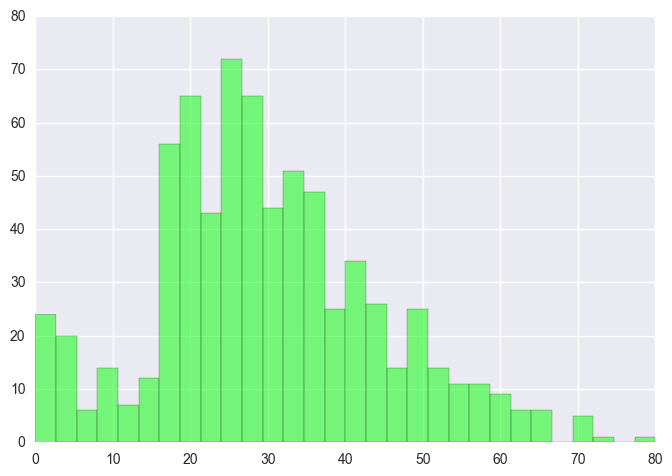

In [75]:
titanic['Age'].dropna().hist( bins=30, range=(0,80), alpha=.5, color='lime')
P.show()

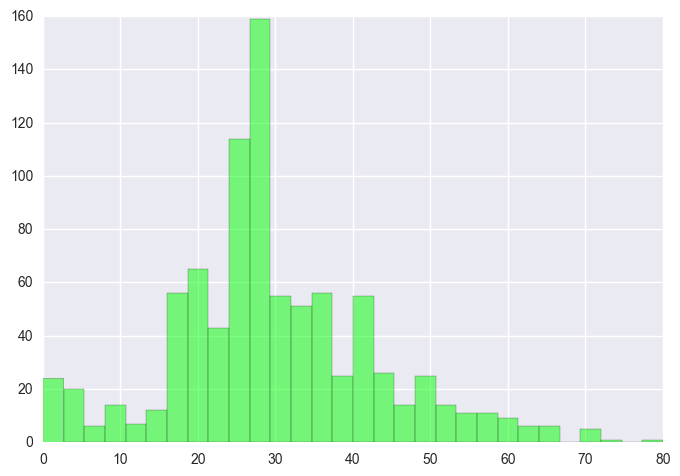

In [76]:
titanic['AgeMean'].hist( bins=30, range=(0,80), alpha=.5, color='lime')
P.show()

In [77]:
titanic_test = fill_missing_age_median(titanic_test)
        
titanic_test[ titanic_test.Age.isnull() ][['Gender', 'Pclass', 'Age', 'AgeMean']].head(10)


,Gender,Pclass,Age,AgeMean
10,1,3,NaN,27.0
22,0,1,NaN,35.0
29,1,3,NaN,27.0
33,0,3,NaN,26.0
36,0,3,NaN,26.0
39,1,3,NaN,27.0
41,1,1,NaN,42.0
47,1,3,NaN,27.0
54,1,2,NaN,31.0
58,1,3,NaN,27.0


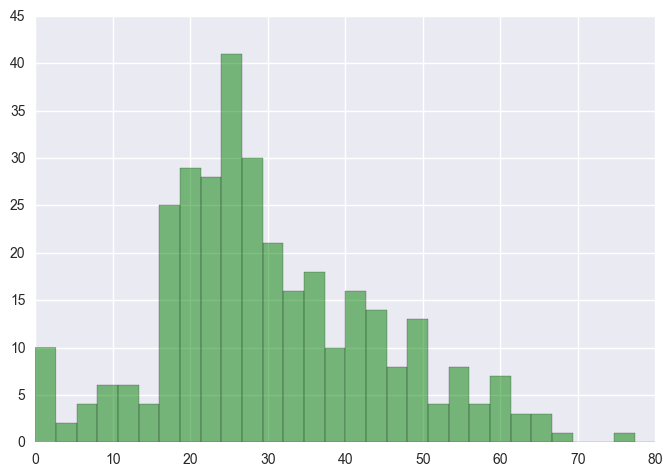

In [78]:
titanic_test['Age'].hist( bins=30, range=(0,80), alpha=.5, color='green')
P.show()

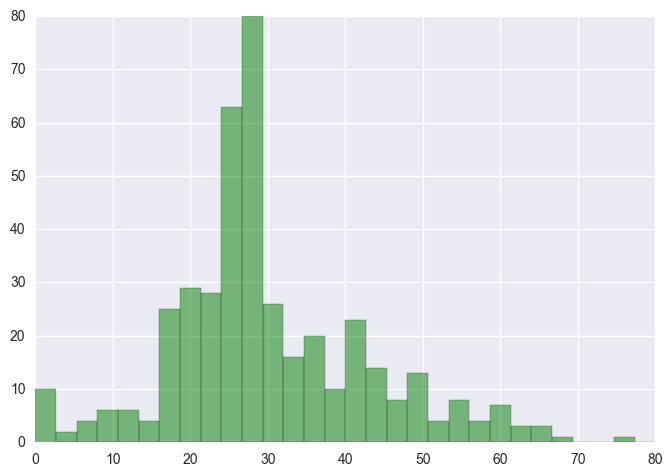

In [79]:
titanic_test['AgeMean'].hist( bins=30, range=(0,80), alpha=.5, color='green')
P.show()

In [80]:
# Fill missing age with random number between mean and std

In [81]:
#df[ df['Age'].isnull() ].groupby(['Port', 'Gender', 'Pclass'])[['Gender', 'Age']].count()

In [82]:
#df[['Age', 'Port', 'Gender', 'Pclass']].dropna().groupby(['Port', 'Gender', 'Pclass']).mean()

In [83]:
#df[['Age', 'Port', 'Gender', 'Pclass']].dropna().groupby(['Port', 'Gender', 'Pclass']).agg([np.size, np.mean, np.std])

In [84]:
# generate random numbers between (mean - std) & (mean + std)

def generate_random(avg, std, sz):
    rand_1 = np.random.randint(avg - std, avg + std, size = sz)
    rand_2 = np.random.randint(avg - std , avg + std, size = sz)

#### Fill missing age with dataframe interpolate (AgeInterp)

In [85]:
def creat_missing_age_interpolate(df):
    df['AgeInterp'] = df['Age']
    df['AgeInterp'] = df[ ['AgeInterp']].interpolate().astype(int)
    return df

In [86]:
titanic = creat_missing_age_interpolate(titanic)
titanic[ titanic['AgeInterp'].isnull() ][['Age', 'AgeInterp']]

,Age,AgeInterp


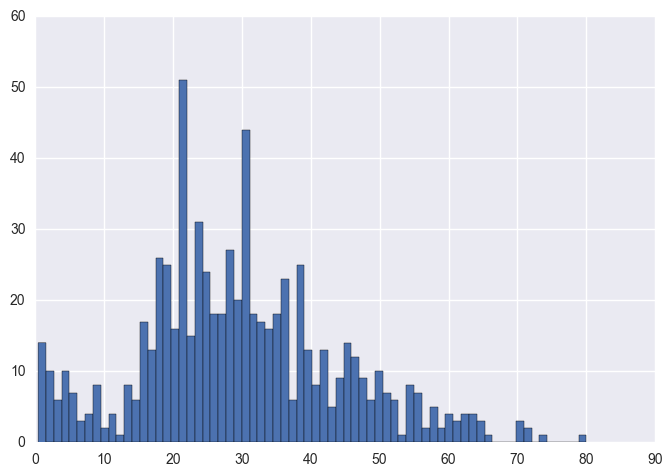

In [87]:
titanic['Age'].dropna().hist(bins=70)
P.show()

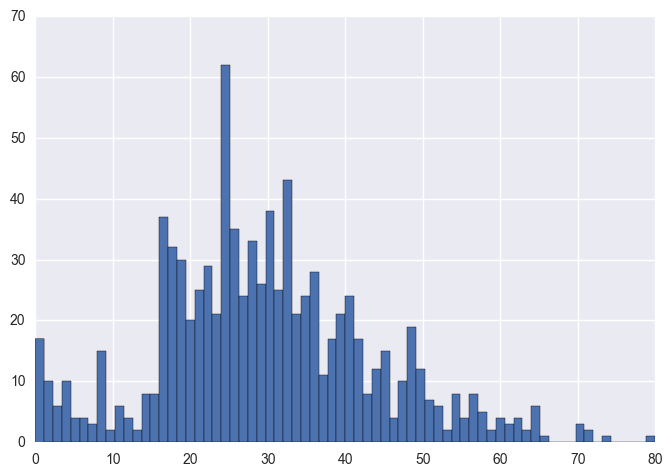

In [88]:
titanic['AgeInterp'].hist(bins=70)
P.show()

In [89]:
titanic_test = creat_missing_age_interpolate(titanic_test)
titanic_test[ titanic_test['AgeInterp'].isnull() ][['Age', 'AgeInterp']]

,Age,AgeInterp


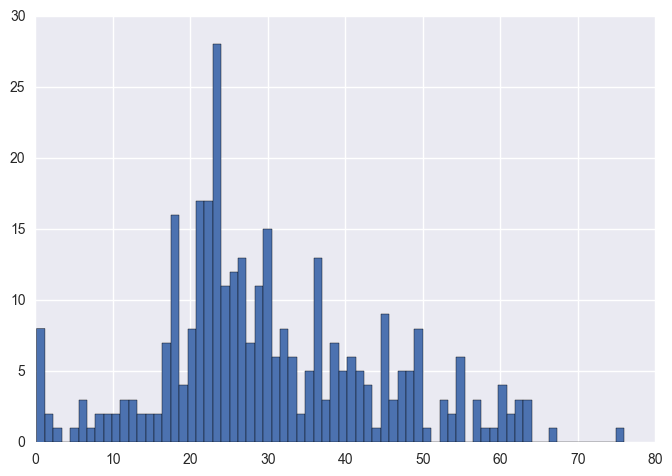

In [90]:
titanic_test.Age.dropna().hist(bins=70)
P.show()

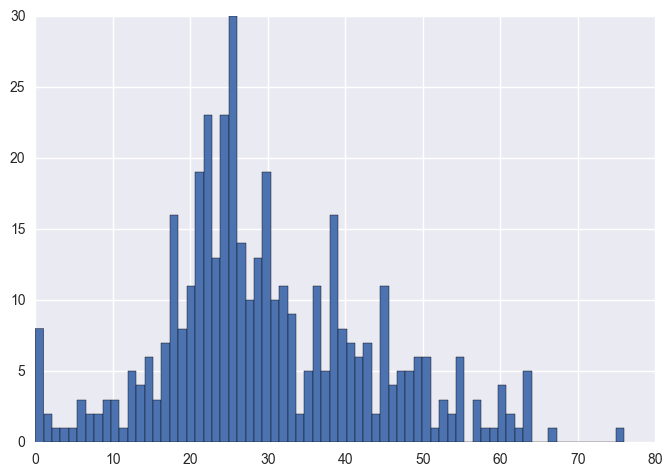

In [91]:
titanic_test.AgeInterp.hist(bins=70)
P.show()

#### Predicting missing values in age using Random Forest

In [92]:
#predicting missing values in age using Random Forest

from sklearn.ensemble import RandomForestRegressor

def fill_missing_age_rf(df):
    
    #Feature set
    df['AgeRF'] = df['Age']
    age_df = df[['AgeRF', 'SibSp','Parch', 'Fare', 'TitleNum','NlengthD', 'Gender', 'Port', 'Pclass', 'FsizeD','DeckZ']]
    
    # Split sets into train and test
    train  = age_df.loc[ (age_df.AgeRF.notnull()) ]# known Age values
    test = age_df.loc[ (age_df.AgeRF.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.AgeRF.isnull()), 'AgeRF' ] = predictedAges 
    
    return df

In [93]:
titanic = fill_missing_age_rf(titanic)

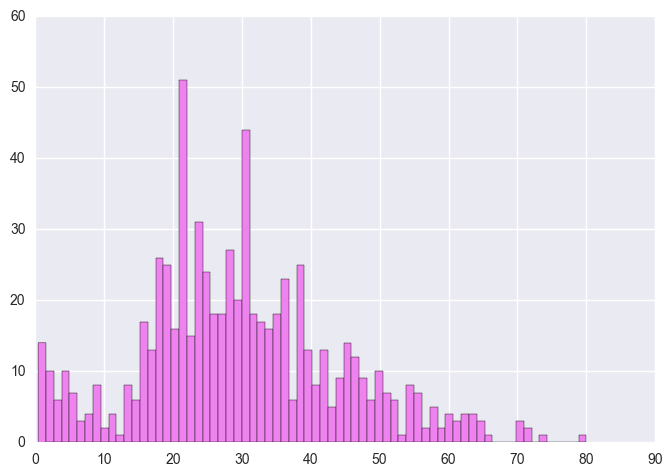

In [94]:
titanic.Age.hist(bins=70, color='violet')
P.show()

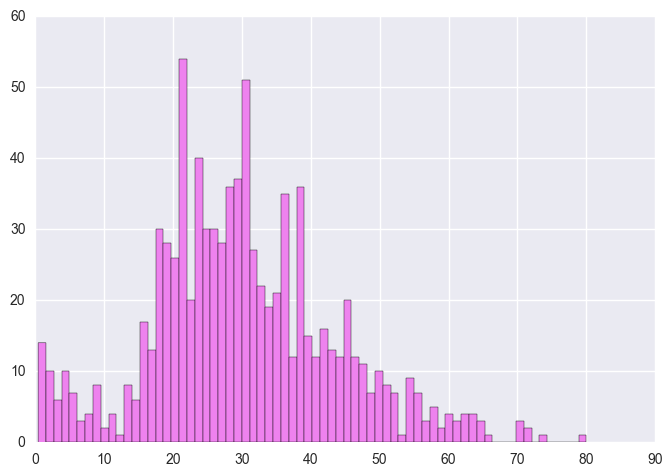

In [95]:
titanic.AgeRF.hist(bins=70, color='violet')
P.show()

In [96]:
titanic_test = fill_missing_age_rf(titanic_test)

#### Create new column AgeInterp*Class

In [97]:
def create_ageclass_col(df):
    df['Age*Class'] = df.AgeInterp * df.Pclass
    
    #bins = [0, 20, 40, 57, 85]
    #group_names = ['a', 'b', 'c', 'd']
    #df['Age*ClassD'] = pd.cut(df['Age*Class'], bins, labels=group_names)
    
    return df

In [98]:
titanic = create_ageclass_col(titanic)
titanic_test = create_ageclass_col(titanic_test)

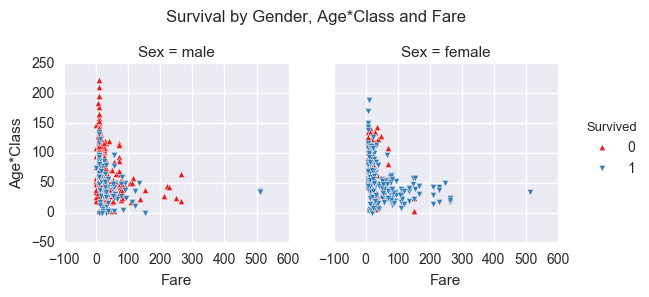

In [99]:
# Survival by Age*Class and Age factored by Gender 
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age*Class",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age*Class and Fare')

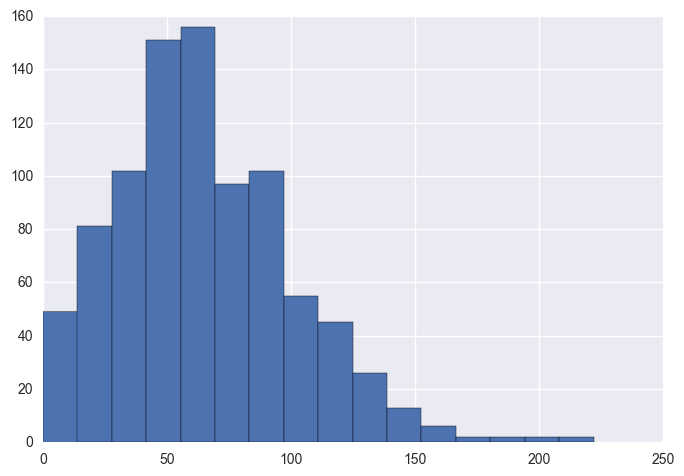

In [100]:
#titanic['Age*Class'].value_count()
titanic['Age*Class'].hist(bins=16)
P.show()

#mosaic(titanic, ['Age*Class', 'Survived'])
#P.show()

## Machine Learning Models

### ---- Set up train_data and test_data ----

In [101]:
titanic.dtypes[titanic.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Deck        object
Title       object
dtype: object

In [102]:
titanic.info()
#titanic.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Deck           204 non-null object
DeckZ          891 non-null int64
NameLength     891 non-null int64
NlengthD       891 non-null float64
Title          891 non-null object
TitleNum       891 non-null float64
Gender         891 non-null int64
Port           891 non-null int64
FamilySize     891 non-null int64
FsizeD         891 non-null int64
TicketClean    891 non-null float64
AgeMean        891 non-null float64
AgeInterp      891 non-null int64
AgeRF          891 non-nul

In [103]:
#titanic_test.info()
titanic_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Deck            True
DeckZ          False
NameLength     False
NlengthD       False
Title          False
TitleNum       False
Gender         False
Port           False
FamilySize     False
FsizeD         False
TicketClean     True
AgeMean        False
AgeInterp      False
AgeRF          False
Age*Class      False
dtype: bool

In [104]:
print 'train_data size:', len(titanic)
print 'test_data size:', len(titanic_test)

train_data size: 891
test_data size: 418


#### Setup test passengerID list and features_train, labels_train, features_test

In [105]:
test_passengerID = titanic_test[['PassengerId']].values

In [106]:
#predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'Port', 'SibSp', 'Parch', 'DeckZ']
#predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'Port', 'Parch', 'DeckZ']
#predictors = ['TitleNum', 'Pclass', 'NlengthD', 'Gender', 'Age*Class', 'DeckZ', 'Fare']
predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'SibSp', 'DeckZ']

In [107]:
features_train = titanic[predictors]
labels_train = titanic["Survived"]
features_test = titanic_test[predictors]

#### Select the most important features - SelectKBest 

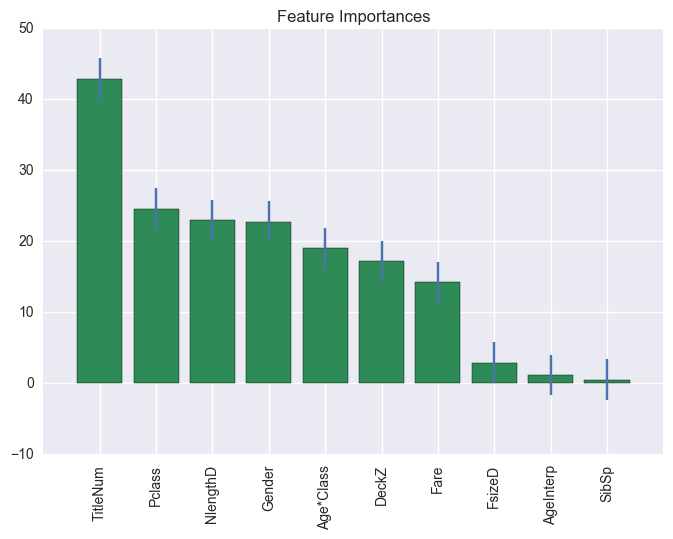

In [108]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(features_train, labels_train)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?  
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()


The seven best features.
predictors = ['TitleNum', 'Pclass', 'NlengthD', 'Gender', 'Age*Class', 'DeckZ', 'Fare']

#### Tryout GaussianNB 

In [109]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)

output = clf.predict(features_test)
print len(output)

prediction_file = open("ml_gaussianNB6.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()
 
# score 0.73684, 0.73206, 

418


### ---- Investigate Algorithm - Randomforest ---- 

#### Get the best fitting parameters for RandomForest

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#features = features_train

cv = KFold(n_splits=5)

parameters = {'n_estimators': [10,20,30,40,50],
               'min_samples_split' :[2,3,4,5],
               'min_samples_leaf' : [1,2,3]
             }

clf = RandomForestClassifier()
grid_obj = GridSearchCV(clf, parameters, cv=cv)
grid_fit = grid_obj.fit(features_train, labels_train)
best_clf = grid_fit.best_estimator_ 

pred = best_clf.predict(features_test)

#### using different set of parameters

In [111]:
# using different set of parameters 

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import KFold

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf.fit(features_train, labels_train)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rf, features_train, labels_train, cv=kf)
# Take the mean of the scores
print(scores.mean())

 
#output = rf.predict(features_test)
output = best_clf.predict(features_test)
print len(output)

prediction_file = open("ml_randomForest39.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()

# score 0.833894500561 (-23), 0.842873176207 (-25), 0.841750841751 (-27), 0.843995510662 (-28)
# actual   0.77512 (-23),       0.76077 (-25),        0.77033 (-27),        0.79426 (-28)       

/Users/LiWang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.824915824916
418


#### check rf classifier features importances

[ 0.20446963  0.05895053  0.19717111  0.12599905  0.0823013   0.12401069
  0.04136712  0.03762144  0.04367182  0.0844373 ]
[0 2 3 5 9 4 1 8 6 7]


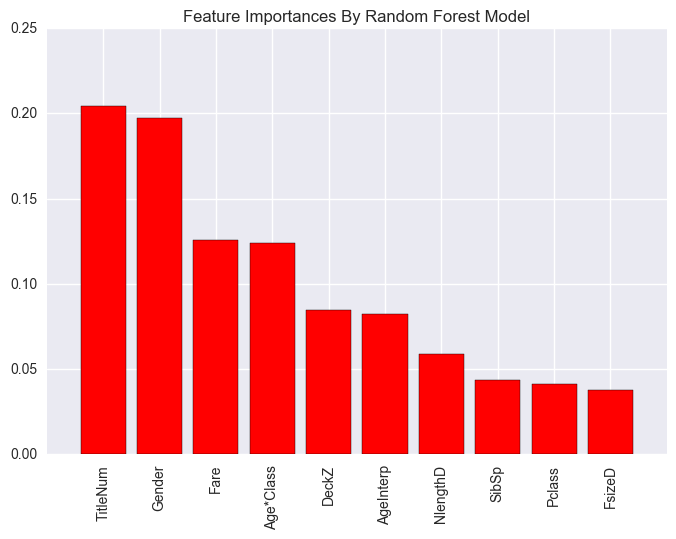

In [112]:
# check rf features importances
importances = rf.feature_importances_
print importances

std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices

sorted_important_features = []
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

#### Use pipeline to chain PCA and SelectKBest before Randomforest Classification

In [113]:
# Create a pipeline that extracts features from the data using PCA and SelectKBest then creates a model_rf

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# create feature union
features_pipeline = []
features_pipeline.append(('pca', PCA(n_components=4)))
features_pipeline.append(('select_best', SelectKBest(k=8)))
feature_union = FeatureUnion(features_pipeline)

# create pipeline for rf
estimators = []
estimators.append(('feature_union', feature_union))
rf_clf = RandomForestClassifier(n_estimators = 108, max_features=3, max_depth=None, min_samples_split=2)
estimators.append(('rf', rf_clf))
model_rf = Pipeline(estimators)

# find best fitting parameter
param_grid = {
            'rf__n_estimators': [10, 20, 30, 40, 50, 60],
            'rf__min_samples_split': [2, 3, 4, 5],
            'rf__max_depth': [1, 2, 3, 4, 5],
            'rf__max_features': [1, 2, 3, 4]
}

grid_rf = GridSearchCV(model_rf, param_grid)
grid_rf = grid_rf.fit(features_train, labels_train)
print grid_rf.best_estimator_

# best fitting rf_clf
best_rf_clf = grid_rf.best_estimator_ 

# evaluate pipeline for rbfSVC
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scores_rf = cross_val_score(model_rf, features_train, labels_train, cv=kfold)
print 'rf mean score:', scores_rf.mean()

# file, rf mean score:
# -60, 0.823882646692 (n_comp=4, kfold=8, n_estimator=50, max_features=3, max_depth=9,min_samples_split=2)
# -61, 0.822709113608 (n_comp=4, kfold=6, random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
# -62


/Users/LiWang/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Pipeline(steps=[('feature_union', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('select_best', SelectKBest(k=8, score_func=<function f_classif at 0x115070c08>))],
       transform...imators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
rf mean score: 0.815980024969


In [114]:
#output = rf.predict(features_test)
output = best_rf_clf.predict(features_test)
print len(output)

prediction_file = open("ml_randomForest61.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()

# Final Score from Kaggle: 76%

418


### ---- Investigate Algorithm SVM with pipeline and train/test split ---- 

In [119]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [120]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_train, labels_train, test_size=0.2, random_state=21)
# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)
# Fit to the training set
cv.fit(X_train, y_train)
# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.826815642458
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       105
          1       0.83      0.73      0.78        74

avg / total       0.83      0.83      0.82       179

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
